In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
input_path = '../input/'
status_file_name = 'status.csv'
station_file_name = 'station.csv'
trip_file_name = 'trip.csv'
weather_file_name = 'weather.csv'
output_path = '../output/'

submit_file_name_1 = 'submission_1_No_1_copy.csv'

In [3]:
status = pd.read_csv(input_path + status_file_name)
station = pd.read_csv(input_path + station_file_name)
weather = pd.read_csv(input_path + weather_file_name)

In [4]:
print(status.shape)
status.head()

(1226400, 8)


,id,year,month,day,hour,station_id,bikes_available,predict
0,0,2013,9,1,0,0,11.0,0
1,1,2013,9,1,1,0,11.0,0
2,2,2013,9,1,2,0,11.0,0
3,3,2013,9,1,3,0,11.0,0
4,4,2013,9,1,4,0,11.0,0


In [8]:
status[status['predict'] == 1].head()

,id,year,month,day,hour,station_id,bikes_available,predict
8761,8761,2014,9,1,1,0,NaN,1
8762,8762,2014,9,1,2,0,NaN,1
8763,8763,2014,9,1,3,0,NaN,1
8764,8764,2014,9,1,4,0,NaN,1
8765,8765,2014,9,1,5,0,NaN,1


In [9]:
#statusのyear, month, dayを結合してdatetime型に
status['date'] = status['year'].astype(str) + '/' + status['month'].astype(str).str.zfill(2).astype(str) + '/' + status['day'].astype(str).str.zfill(2).astype(str)
status['date'] = pd.to_datetime(status['date'])
status.head()

,id,year,month,day,hour,station_id,bikes_available,predict,date
0,0,2013,9,1,0,0,11.0,0,2013-09-01
1,1,2013,9,1,1,0,11.0,0,2013-09-01
2,2,2013,9,1,2,0,11.0,0,2013-09-01
3,3,2013,9,1,3,0,11.0,0,2013-09-01
4,4,2013,9,1,4,0,11.0,0,2013-09-01


In [12]:
status.tail()

,id,year,month,day,hour,station_id,bikes_available,predict,date
1226395,1226395,2015,8,31,19,69,8.0,0,2015-08-31
1226396,1226396,2015,8,31,20,69,8.0,0,2015-08-31
1226397,1226397,2015,8,31,21,69,8.0,0,2015-08-31
1226398,1226398,2015,8,31,22,69,8.0,0,2015-08-31
1226399,1226399,2015,8,31,23,69,8.0,0,2015-08-31


In [13]:
status[status['predict'] == 1]['date'].nunique()

120

In [14]:
station.head()

,station_id,lat,long,dock_count,city,installation_date
0,0,37.32973,-121.90178,27,city1,8/6/2013
1,1,37.33070,-121.88898,15,city1,8/5/2013
2,2,37.33399,-121.89490,11,city1,8/6/2013
3,3,37.33141,-121.89320,19,city1,8/5/2013
4,4,37.33672,-121.89407,15,city1,8/7/2013


In [16]:
station['installation_date'] = pd.to_datetime(station['installation_date'])
print(station['installation_date'].min())
print(station['installation_date'].max())

2013-08-05 00:00:00
2014-04-09 00:00:00


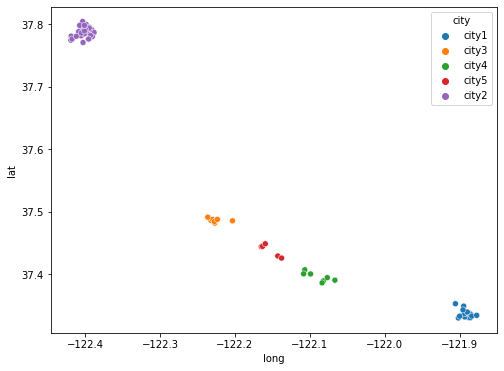

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='long', y='lat', hue='city', data=station)
plt.show()

In [18]:
print(weather.shape)
weather.head()

(730, 22)


,date,max_temperature,mean_temperature,min_temperature,max_dew_point,mean_dew_point,min_dew_point,max_humidity,mean_humidity,min_humidity,...,min_sea_level_pressure,max_visibility,mean_visibility,min_visibility,max_wind_Speed,mean_wind_speed,precipitation,cloud_cover,events,wind_dir_degrees
0,2013-09-01,81,70,61,62,58,54,80,67,47,...,29.85,10,10,10,14,4,0.00,1,NaN,354
1,2013-09-02,80,71,66,64,61,58,80,70,58,...,29.86,10,10,10,14,4,0.00,5,NaN,337
2,2013-09-03,81,69,58,60,56,52,82,65,44,...,29.93,10,10,10,19,2,1.71,6,Rain,341
3,2013-09-04,82,68,56,61,55,49,81,64,43,...,29.94,10,10,10,15,0,0.00,0,NaN,324
4,2013-09-05,81,68,56,59,54,50,81,63,41,...,29.95,10,10,10,16,1,0.00,0,NaN,335


In [21]:
weather['date'] = pd.to_datetime(weather['date'])
print(weather['date'].nunique())

730


In [23]:
print(weather['date'].min())
print(weather['date'].max())

2013-09-01 00:00:00
2015-08-31 00:00:00


In [25]:
status = pd.merge(status, station[['station_id', 'city']], how='left')

In [26]:
status.head()

,id,year,month,day,hour,station_id,bikes_available,predict,date,city
0,0,2013,9,1,0,0,11.0,0,2013-09-01,city1
1,1,2013,9,1,1,0,11.0,0,2013-09-01,city1
2,2,2013,9,1,2,0,11.0,0,2013-09-01,city1
3,3,2013,9,1,3,0,11.0,0,2013-09-01,city1
4,4,2013,9,1,4,0,11.0,0,2013-09-01,city1


In [29]:
status= pd.merge(status,weather[['date', 'precipitation']], how ='left')
status.head()

,id,year,month,day,hour,station_id,bikes_available,predict,date,city,precipitation
0,0,2013,9,1,0,0,11.0,0,2013-09-01,city1,0.0
1,1,2013,9,1,1,0,11.0,0,2013-09-01,city1,0.0
2,2,2013,9,1,2,0,11.0,0,2013-09-01,city1,0.0
3,3,2013,9,1,3,0,11.0,0,2013-09-01,city1,0.0
4,4,2013,9,1,4,0,11.0,0,2013-09-01,city1,0.0


In [30]:
status['week_num'] = status['date'].dt.weekday
status.head()

,id,year,month,day,hour,station_id,bikes_available,predict,date,city,precipitation,week_num
0,0,2013,9,1,0,0,11.0,0,2013-09-01,city1,0.0,6
1,1,2013,9,1,1,0,11.0,0,2013-09-01,city1,0.0,6
2,2,2013,9,1,2,0,11.0,0,2013-09-01,city1,0.0,6
3,3,2013,9,1,3,0,11.0,0,2013-09-01,city1,0.0,6
4,4,2013,9,1,4,0,11.0,0,2013-09-01,city1,0.0,6


In [32]:
status

,id,year,month,day,hour,station_id,bikes_available,predict,date,city,precipitation,week_num
0,0,2013,9,1,0,0,11.0,0,2013-09-01,city1,0.0,6
1,1,2013,9,1,1,0,11.0,0,2013-09-01,city1,0.0,6
2,2,2013,9,1,2,0,11.0,0,2013-09-01,city1,0.0,6
3,3,2013,9,1,3,0,11.0,0,2013-09-01,city1,0.0,6
4,4,2013,9,1,4,0,11.0,0,2013-09-01,city1,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1226395,1226395,2015,8,31,19,69,8.0,0,2015-08-31,city1,0.0,0
1226396,1226396,2015,8,31,20,69,8.0,0,2015-08-31,city1,0.0,0
1226397,1226397,2015,8,31,21,69,8.0,0,2015-08-31,city1,0.0,0
1226398,1226398,2015,8,31,22,69,8.0,0,2015-08-31,city1,0.0,0


In [33]:
t = status.groupby(['station_id', 'date']).first()['bikes_available'].reset_index()
t = pd.DataFrame(np.repeat(t.values, 24, axis=0))
t.columns = ['station_id', 'date', 'bikes_available_at0']
t.head(10)

,station_id,date,bikes_available_at0
0,0,2013-09-01,11
1,0,2013-09-01,11
2,0,2013-09-01,11
3,0,2013-09-01,11
4,0,2013-09-01,11
5,0,2013-09-01,11
6,0,2013-09-01,11
7,0,2013-09-01,11
8,0,2013-09-01,11
9,0,2013-09-01,11


In [34]:
status['bikes_available_at0'] = t['bikes_available_at0']

In [36]:
cols = ['city']
encoder = ce.CountEncoder()
temp_ = encoder.fit_transform(status[cols]).add_prefix("CE_")

status = pd.concat([status, temp_], axis=1)

In [37]:
status.head()

,id,year,month,day,hour,station_id,bikes_available,predict,date,city,precipitation,week_num,bikes_available_at0,CE_city
0,0,2013,9,1,0,0,11.0,0,2013-09-01,city1,0.0,6,11,280320
1,1,2013,9,1,1,0,11.0,0,2013-09-01,city1,0.0,6,11,280320
2,2,2013,9,1,2,0,11.0,0,2013-09-01,city1,0.0,6,11,280320
3,3,2013,9,1,3,0,11.0,0,2013-09-01,city1,0.0,6,11,280320
4,4,2013,9,1,4,0,11.0,0,2013-09-01,city1,0.0,6,11,280320


In [40]:
#2014/09/01以前をtrain,以後をtestに分割（testはpredict = 1のものに絞る）
train = status[status['date'] < '2014-09-01']
test = status[(status['date'] >= '2014-09-01') & (status['predict'] == 1)]

In [41]:
train = train[train['bikes_available'].notna()]

In [42]:
#使用カラムを限定
train = train[['hour', 'station_id', 'CE_city', 'precipitation', 'week_num', 'bikes_available_at0', 'bikes_available']]
test_X = test[['hour', 'station_id', 'CE_city', 'precipitation', 'week_num', 'bikes_available_at0']]

In [43]:
#trainをtrain, validに分割
train_, valid_ = train_test_split(train, test_size=0.3)
#説明変数と目的変数に分離
train_X = train_.drop('bikes_available', axis = 1)
train_y = train_['bikes_available']
valid_X = valid_.drop('bikes_available', axis = 1)
valid_y = valid_['bikes_available']

In [44]:
#validデータのrmse
mean_squared_error(valid_y, valid_X['bikes_available_at0'], squared=False)

3.0867550664941996

In [45]:
#モデリング
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=15, random_state=42)
regr.fit(train_X, train_y)

RandomForestRegressor(max_depth=15, random_state=42)

In [47]:
val_predict = regr.predict(valid_X)

In [48]:
test_predict = regr.predict(test_X)

In [51]:
sub_index = status[status['predict'] == 1].index
sub_df = pd.DataFrame(list(zip(sub_index,test_predict)))
sub_df.head()

,0,1
0,8761,14.912650
1,8762,14.935280
2,8763,14.916455
3,8764,14.914169
4,8765,14.924561


In [55]:
sub_df.to_csv(output_path + submit_file_name_1, index=False, header=False)